#Task_2 : Data Visualization using the NYSE dataset

##Importing Libarary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the datasets

In [3]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [5]:
# Try to parse dates automatically when reading the CSV
prices_df = pd.read_csv("prices.csv", parse_dates=True)
print("Column names:", prices_df.columns.tolist())
print("Data types:")
print(prices_df.dtypes)
print("Prices data shape:", prices_df.shape)
prices_df.head(3)

Column names: ['date', 'symbol', 'open', 'close', 'low', 'high', 'volume']
Data types:
date       object
symbol     object
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object
Prices data shape: (851264, 7)


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0


####Basic dataset info




In [6]:
print("Stocks in dataset:", prices_df['symbol'].nunique())
print("Date range:", prices_df['date'].min(), "to", prices_df['date'].max())
print("Columns:", prices_df.columns.tolist())


Stocks in dataset: 501
Date range: 2010-01-04 to 2016-12-30 00:00:00
Columns: ['date', 'symbol', 'open', 'close', 'low', 'high', 'volume']


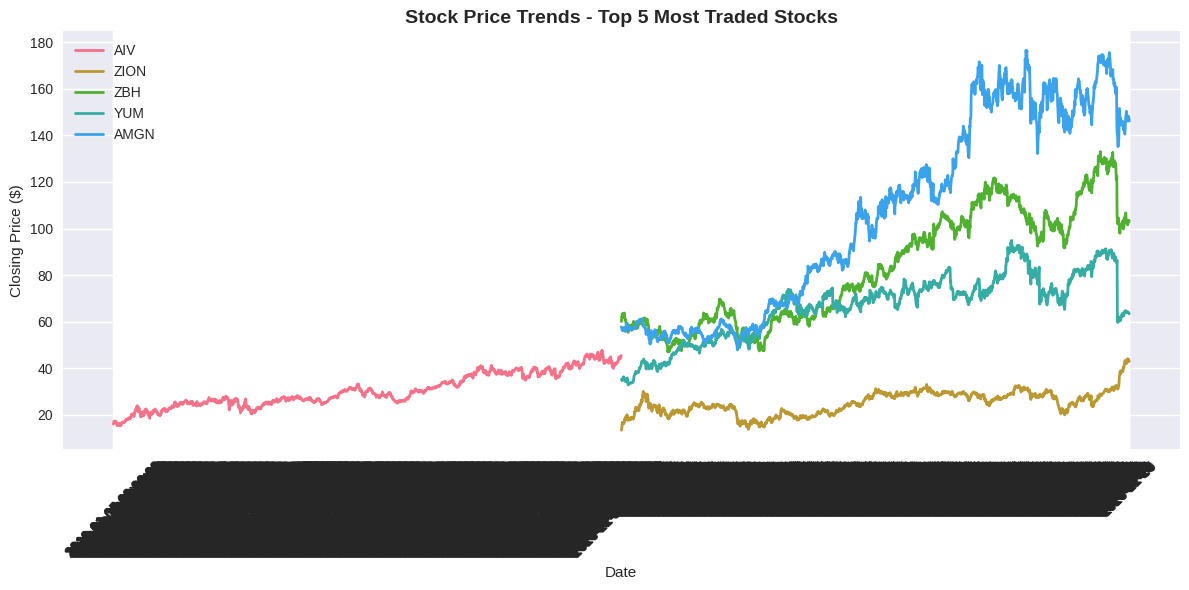

In [7]:
# Stock price trends for top 5 stocks
top_stocks = prices_df['symbol'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
for stock in top_stocks:
    stock_data = prices_df[prices_df['symbol'] == stock]
    plt.plot(stock_data['date'], stock_data['close'], label=stock, linewidth=2)

plt.title('Stock Price Trends - Top 5 Most Traded Stocks', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Daily price volatility (high-low difference)

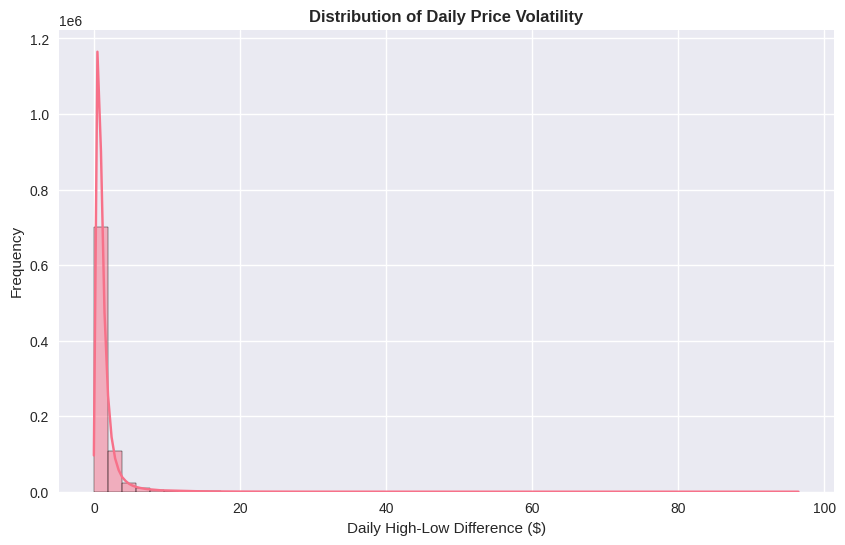

In [8]:
prices_df['volatility'] = prices_df['high'] - prices_df['low']

plt.figure(figsize=(10, 6))
sns.histplot(prices_df['volatility'], bins=50, kde=True)
plt.title('Distribution of Daily Price Volatility', fontweight='bold')
plt.xlabel('Daily High-Low Difference ($)')
plt.ylabel('Frequency')
plt.show()

Trading volume analysis

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


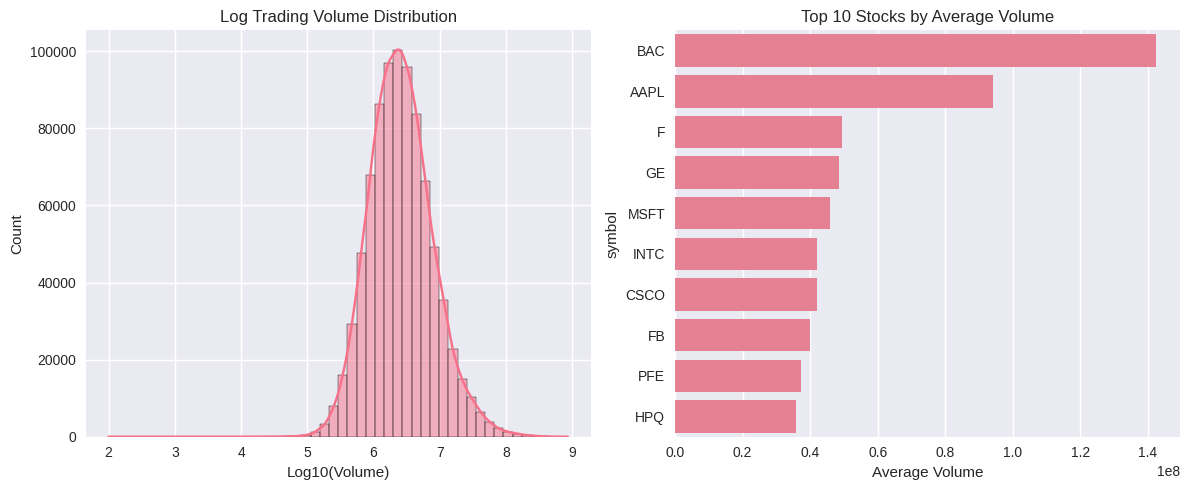

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(np.log10(prices_df['volume']), bins=50, kde=True)
plt.title('Log Trading Volume Distribution')
plt.xlabel('Log10(Volume)')

plt.subplot(1, 2, 2)
top_10_volume = prices_df.groupby('symbol')['volume'].mean().nlargest(10)
sns.barplot(y=top_10_volume.index, x=top_10_volume.values)
plt.title('Top 10 Stocks by Average Volume')
plt.xlabel('Average Volume')
plt.tight_layout()
plt.show()

###Monthly performance heatmap

Used string extraction as fallback


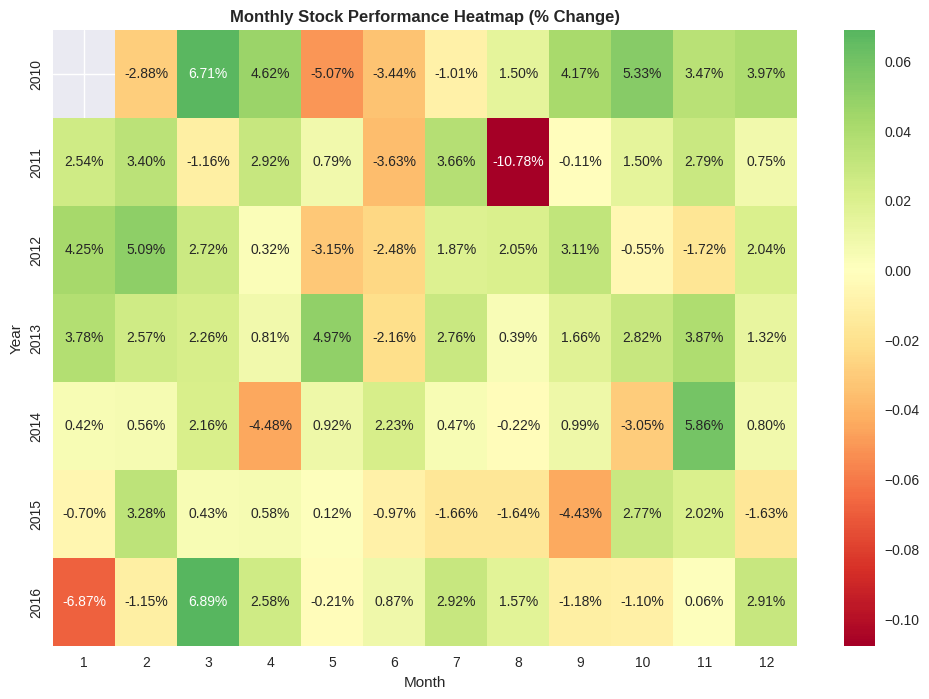

In [13]:
# If datetime conversion doesn't work, try extracting year/month from string
try:
    prices_df['date'] = pd.to_datetime(prices_df['date'])
    prices_df['month'] = prices_df['date'].dt.month
    prices_df['year'] = prices_df['date'].dt.year
except:
    # Fallback: extract from string if format is consistent (e.g., 'YYYY-MM-DD')
    prices_df['year'] = prices_df['date'].str[:4].astype(int)
    prices_df['month'] = prices_df['date'].str[5:7].astype(int)
    print("Used string extraction as fallback")

monthly_returns = prices_df.groupby(['year', 'month'])['close'].mean().pct_change().dropna()
monthly_matrix = monthly_returns.reset_index().pivot(index='year', columns='month', values='close')

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_matrix, cmap='RdYlGn', center=0, annot=True, fmt='.2%')
plt.title('Monthly Stock Performance Heatmap (% Change)', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

#### Price correlations between major stocks

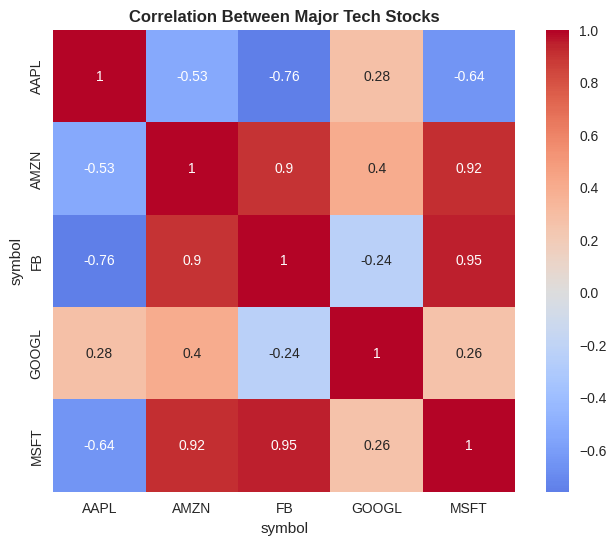

In [14]:
major_stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB']
major_data = prices_df[prices_df['symbol'].isin(major_stocks)]
pivot_data = major_data.pivot_table(index='date', columns='symbol', values='close')

plt.figure(figsize=(8, 6))
correlation_matrix = pivot_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Between Major Tech Stocks', fontweight='bold')
plt.show()

#####Daily returns distribution

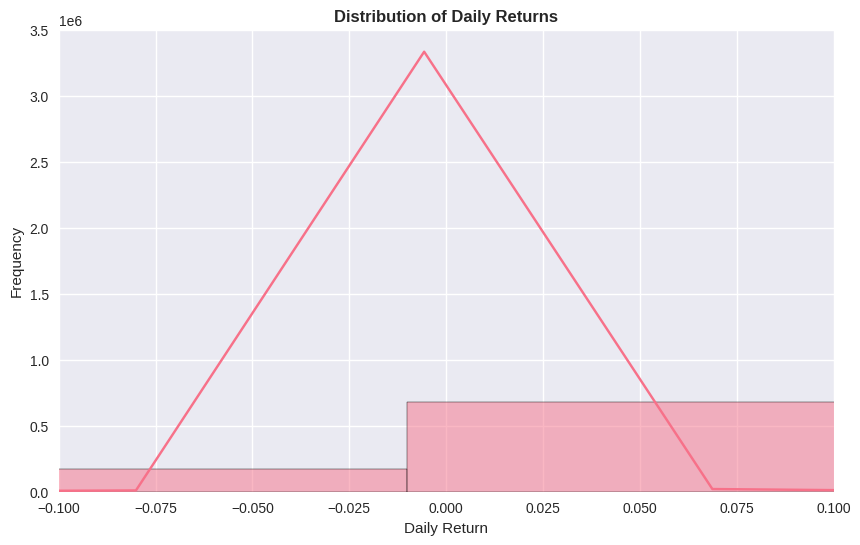

In [16]:
prices_df['daily_return'] = prices_df.groupby('symbol')['close'].pct_change()

plt.figure(figsize=(10, 6))
sns.histplot(prices_df['daily_return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns', fontweight='bold')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.xlim(-0.1, 0.1)
plt.show()

### Stock performance comparison (normalized)

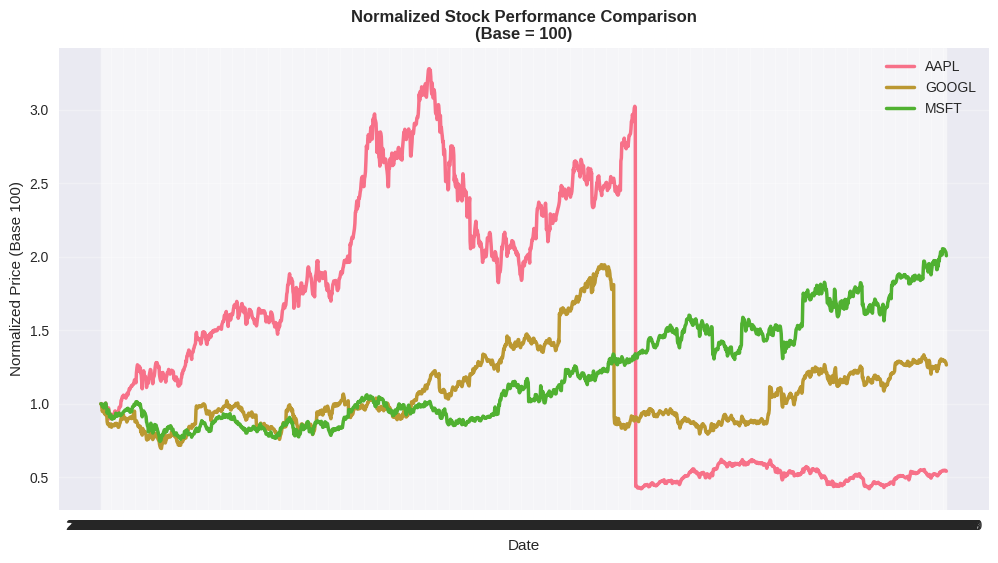

In [17]:
comparison_stocks = ['AAPL', 'GOOGL', 'MSFT']

plt.figure(figsize=(12, 6))
for stock in comparison_stocks:
    stock_data = prices_df[prices_df['symbol'] == stock].sort_values('date')
    normalized_price = stock_data['close'] / stock_data['close'].iloc[0]
    plt.plot(stock_data['date'], normalized_price, label=stock, linewidth=2.5)

plt.title('Normalized Stock Performance Comparison\n(Base = 100)', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base 100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Volatility by stock

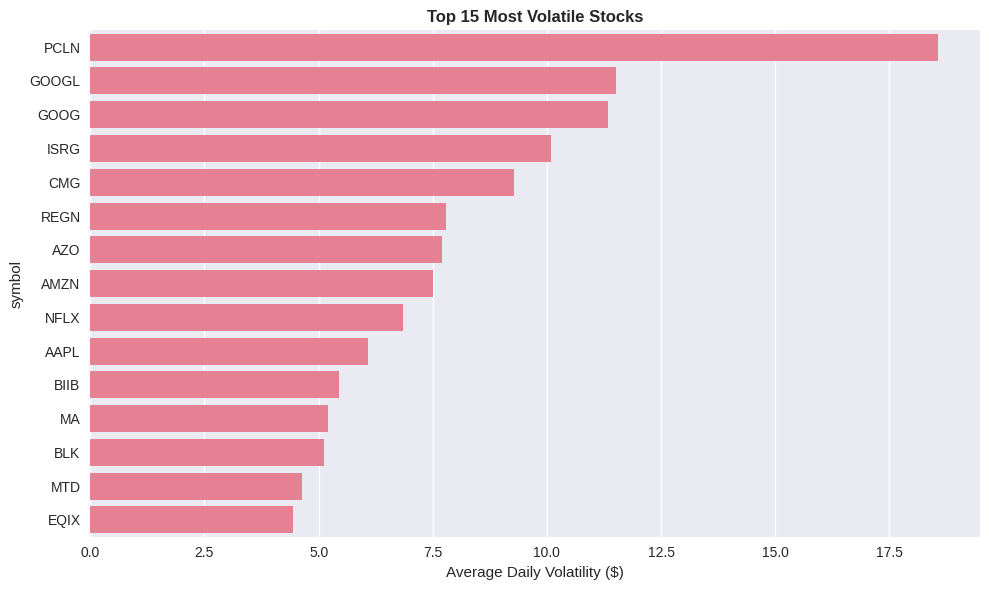

In [18]:
volatility_by_stock = prices_df.groupby('symbol')['volatility'].mean().nlargest(15)

plt.figure(figsize=(10, 6))
sns.barplot(y=volatility_by_stock.index, x=volatility_by_stock.values)
plt.title('Top 15 Most Volatile Stocks', fontweight='bold')
plt.xlabel('Average Daily Volatility ($)')
plt.tight_layout()
plt.show()

##  Price vs Volume scatter plot

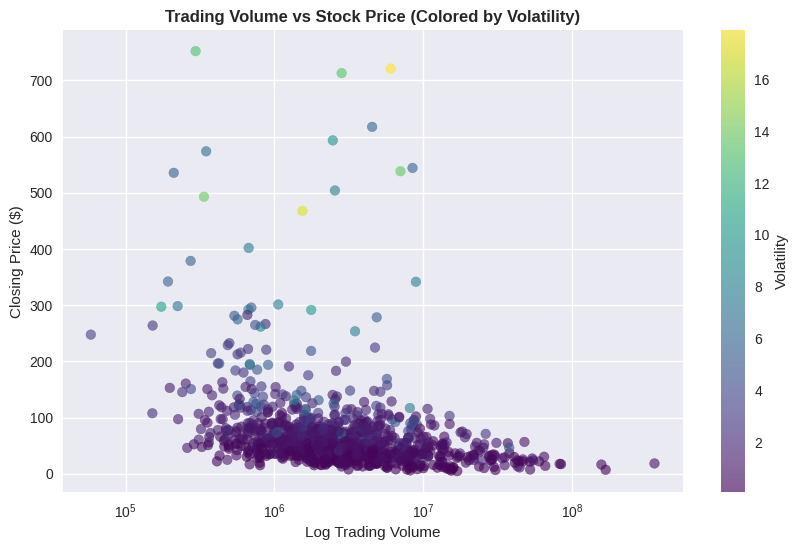

In [19]:
sample_data = prices_df.sample(1000)  # Sample for clarity

plt.figure(figsize=(10, 6))
plt.scatter(sample_data['volume'], sample_data['close'], alpha=0.6, c=sample_data['volatility'], cmap='viridis')
plt.colorbar(label='Volatility')
plt.xscale('log')
plt.title('Trading Volume vs Stock Price (Colored by Volatility)', fontweight='bold')
plt.xlabel('Log Trading Volume')
plt.ylabel('Closing Price ($)')
plt.show()

##Monthly average closing prices

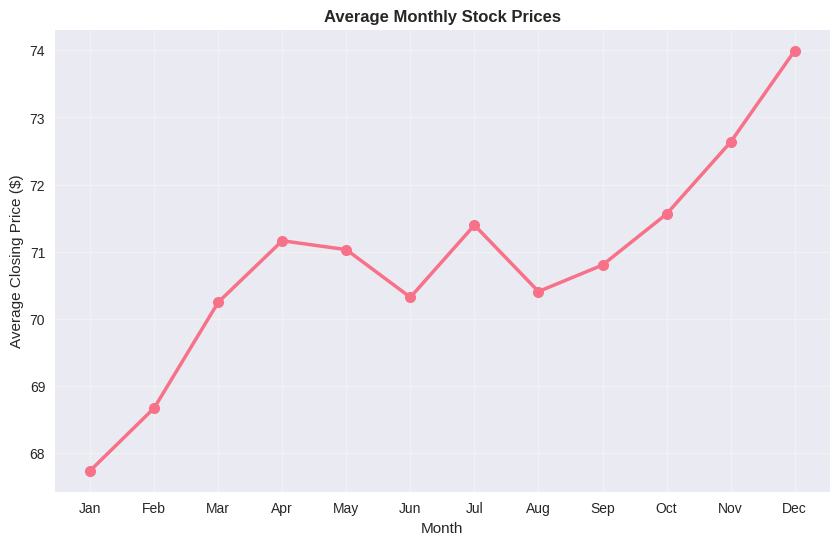

In [20]:
monthly_avg = prices_df.groupby('month')['close'].mean()

plt.figure(figsize=(10, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, monthly_avg.values, marker='o', linewidth=2.5, markersize=8)
plt.title('Average Monthly Stock Prices', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Average Closing Price ($)')
plt.grid(True, alpha=0.3)
plt.show()

## Stock performance categories

/tmp/ipython-input-3426676531.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stock_performance = prices_df.groupby('symbol').apply(


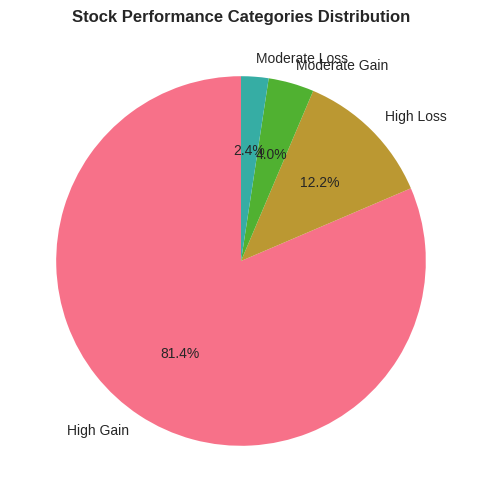

In [21]:
def categorize_performance(returns):
    if returns > 0.1: return 'High Gain'
    elif returns > 0: return 'Moderate Gain'
    elif returns > -0.1: return 'Moderate Loss'
    else: return 'High Loss'

stock_performance = prices_df.groupby('symbol').apply(
    lambda x: (x['close'].iloc[-1] - x['close'].iloc[0]) / x['close'].iloc[0]
).dropna()

performance_categories = stock_performance.apply(categorize_performance)

plt.figure(figsize=(8, 6))
performance_categories.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Stock Performance Categories Distribution', fontweight='bold')
plt.ylabel('')
plt.show()

## Closing price distribution by major sectors (example)

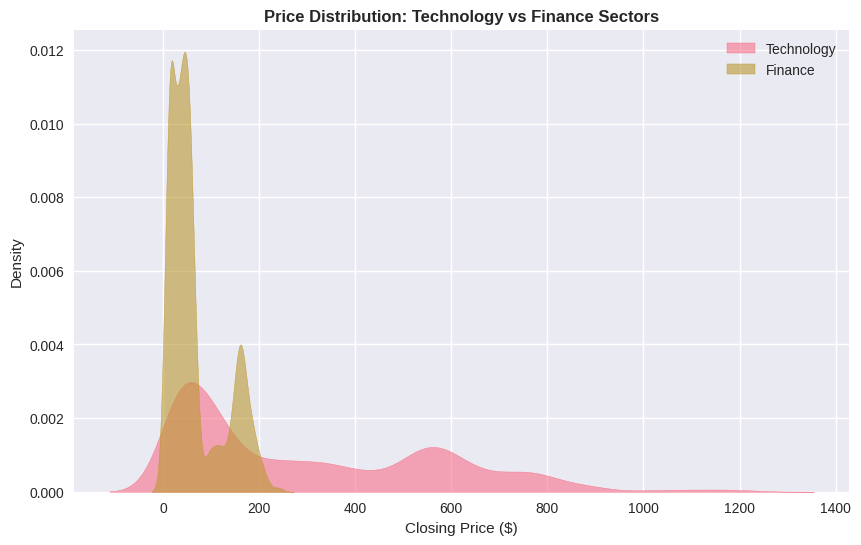

In [22]:
tech_stocks = ['AAPL', 'GOOGL', 'MSFT', 'FB', 'AMZN']
finance_stocks = ['JPM', 'GS', 'BAC', 'WFC']

tech_prices = prices_df[prices_df['symbol'].isin(tech_stocks)]['close']
finance_prices = prices_df[prices_df['symbol'].isin(finance_stocks)]['close']

plt.figure(figsize=(10, 6))
sns.kdeplot(tech_prices, label='Technology', fill=True, alpha=0.6)
sns.kdeplot(finance_prices, label='Finance', fill=True, alpha=0.6)
plt.title('Price Distribution: Technology vs Finance Sectors', fontweight='bold')
plt.xlabel('Closing Price ($)')
plt.ylabel('Density')
plt.legend()
plt.show()

##Cumulative returns over time

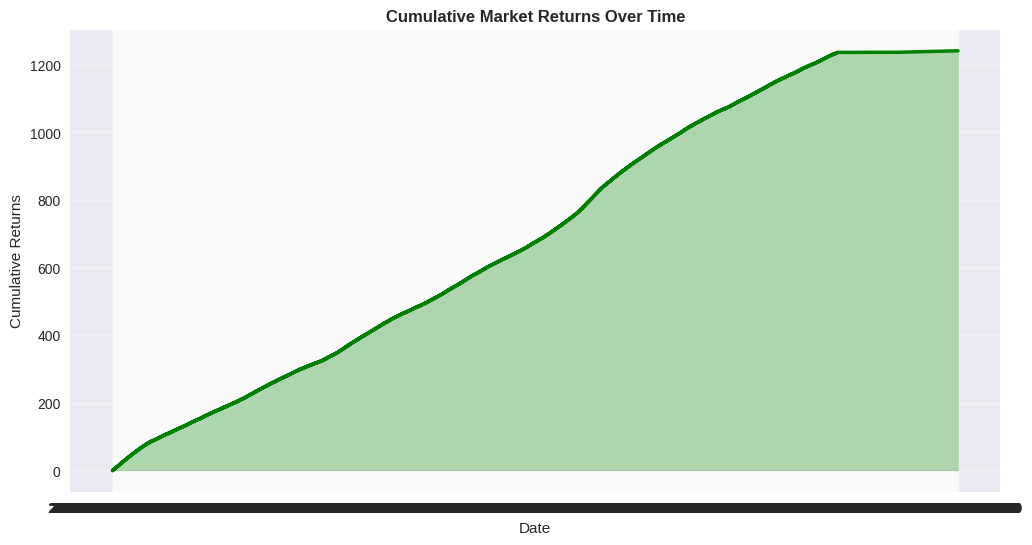

In [23]:
cumulative_returns = prices_df.groupby('date')['close'].mean().pct_change().cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns.values, linewidth=2.5, color='green')
plt.title('Cumulative Market Returns Over Time', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True, alpha=0.3)
plt.fill_between(cumulative_returns.index, cumulative_returns.values, alpha=0.3, color='green')
plt.show()

##Summary

In [25]:
print("📊 NYSE DATA VISUALIZATION SUMMARY")
print("="*40)
print(f"• Dataset: {prices_df.shape[0]:,} price records")
print(f"• Stocks analyzed: {prices_df['symbol'].nunique()}")

print(f"• Average daily volatility: ${prices_df['volatility'].mean():.2f}")
print(f"• Average closing price: ${prices_df['close'].mean():.2f}")
print(f"• Most traded stock: {prices_df['symbol'].value_counts().index[0]}")

📊 NYSE DATA VISUALIZATION SUMMARY
• Dataset: 851,264 price records
• Stocks analyzed: 501
• Average daily volatility: $1.43
• Average closing price: $70.86
• Most traded stock: AIV
